# Tutorial 1: Data Exploration and Data Quality

## Question 2

### Step 1 : Import Breast Cancer Dataset

**<font color='red'>Code: Uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the 
       the data frame</font>**

In [1]:
import pandas as pd
data = pd.read_csv('T1Q2_breast_cancer.data', header=None)
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code number'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


### a)Missing Data

### Step 1 : Identity Missing Data in the attributes

#### i)Identity those attributes that have missing data and convert these missing data values in these attributes to NaNs
    
#### ii)count the number of missing values in each of these attributes

<font color='red'>Code: </font>

In [2]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
    

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


### Step 2 : Approach 1-> Replace Missing Data with median value of the attribute

**<font color='red'>Code: Bare Nuclei is the one that has missing data. </font>**

In [3]:
data2 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:60])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:60])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
32      5
33      1
34      1
35      1
36      1
37      1
38     10
39      7
40    NaN
41      3
42     10
43      1
44      1
45      1
46      9
47      1
48      1
49      8
50      3
51      4
52      5
53      8
54      8
55      5
56      6
57      1
58     10
59      2
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10
21     7
22     1
23     1
24     1
25     7
26     1
27     1
28     1
29     1
30     1
31     1
32     5
33     1
34     1
35     1
36     1
37     1
38    10
39     7
40     1
41     3
42    10
43     1
44     1
45     1
46     9
47     1
48     1
49     8
50     3
51     4
52     5
53     8
54     8
55     5
56     6
57     1
58    10
59     2
Name: Bare Nuclei, dtype: object


### Step 2 : Approach 2-> Drop Missing Data

**<font color='red'>Code: </font>**

In [4]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### b)Outlier Data

### Step 1 : Identity Outlier Data in the attributes

#### i)Ensure those missing data has been replaced by NaNs as done in part(a) as we are checking anomality based on integer (int64).
    
#### ii)Drop the class attribute in the data using drop() function as class attribute is qualitative and not quantitative

#### iii)Using boxplot() function to plot to visualize the outliers. You will observe five attributes will have abnormally high values in some of their dataset.

**<font color='red'>Code: </font>**

<AxesSubplot:>

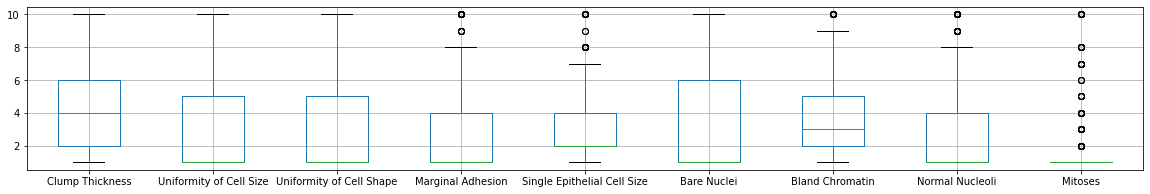

In [5]:
%matplotlib inline
# the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings 
# such as '?' for representing missing values). Thus, we must convert the column into numeric values first before 
# creating the boxplot

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data2 = data.drop(['Class'],axis=1)

data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values.

### Step 2 : Discard Outliers

#### Use Z score methodology for each attribute to remove such outlier
####   a. Calculate z score of each data value of an attribute where 
𝑧 = (x − $\bar x )$/𝜇 where x is each data value for an attribute and 
$\bar x$ is the
mean value of an attributes. 𝜇 is the standard deviation value
for an attribute

#### b. Drop data that has 𝑧 > 3 or 𝑧 < −3.

**<font color='red'>Code:Z score</font>** 

In [6]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


Note that missing values (NaN) are not affected by the standardization process.

**<font color='red'>Code:Discard Z>3 and Z<-3 </font>** 

In [7]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))
 
        

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


### C)Duplicate Data

### Step 1 : Identity Duplicate Data

**<font color='red'>Code:</font>** 

In [8]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[10,11,12,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
10,1,1,1,1,1,1.0,3,1,1,2
11,2,1,1,1,2,1.0,2,1,1,2
12,5,3,3,3,2,3.0,4,4,1,4
28,2,1,1,1,2,1.0,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous 
row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the 
instance with row index 11 has identical attribute values as the instance with row index 28. Although such 
duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that 
the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

### Step 2 : Drop Duplicate Data

**<font color='red'>Code:</font>** 

In [9]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463
